# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [8]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [9]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

A_e1 = A @ e_1
A_e2 = A @ e_2
A_e3 = A @ e_3
A_e1, A_e2, A_e3

(array([1, 4, 7]), array([2, 5, 8]), array([3, 6, 9]))

When you multiply matrix A by one of the standard basis vectors such as e_1, e_2, and e_3, I am effectively selecting one specific column of the matrix A. This happens because each element of the resulting vector is computed as the dot product of a row of 
A with the entire vector. Since each vector has a single 1 in one position and 0’s elsewhere, all entries in that row’s dot product vanish except for the term corresponding to the column where the 1 is located. For example, when multiplying by e_1, only the first column’s values of A contribute, resulting in a new vector equal to the first column of A. Similarly multiplying by e_2 and e_3 gives the second or third column, respectively. In short, multiplying A by a basis vector isolates and returns the corresponding column of A.

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [10]:
u = np.ones(3)

A_u = A @ u
A_u

array([ 6., 15., 24.])

When you multiply the matrix A by the vector, each value in the resulting vector comes from taking one row of the matrix and multiplying each number in that row by the matching number in the vector then adding them all together. Because every value in the vector is one, this process adds up all the numbers in each row of the matrix. The first value of the result is the sum of the first row, the second value is the sum of the second row, and so on. So, multiplying a matrix by a vector of all ones gives you a new vector containing the sum of each row of the original matrix.

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [11]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])

A_x = A @ x
A_x

array([-2,  4, 11])

When you multiply an identity matrix by any vector, the result is the exact same vector you started with. This happens because, by definition, an identity matrix has ones on its diagonal and zeros everywhere else. During multiplication, each value in the resulting vector is formed by taking one row of the matrix and combining it with the vector’s values. Since each row of the identity matrix has only one nonzero entry (a one in the position that matches the corresponding element of the vector), each element of the result simply copies that same value from the original vector. In other words, the identity matrix acts like a neutral element in multiplication which leaves the vector unchanged.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [12]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

Ax1 = A @ x
Ax1

array([11, -2,  4])

In [13]:
# Creating another matrix 
B = np.array([[0,1,0],
              [0,0,1],
              [1,0,0]])   # cycles (x1,x2,x3) -> (x2,x3,x1)

Bx = B @ x
Bx

array([ 4, 11, -2])

These matrices are called permutation matrices. Each row and each column adds up to one which means they don’t change the size or scale of the numbers in a vector. They rearrange their order. When you multiply a vector by a permutation matrix, you’re not combining or altering the values but moving them into new positions. In the first case, the matrix takes the third number from the original vector and moves it to the first spot, the first number to the second spot, and the second number to the third spot. In the second case, the matrix moves the second number to the first spot, the third number to the second spot, and the first number to the third spot. Essentially, permutation matrices shuffle the entries of a vector without changing their actual values.

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [14]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


In [15]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

A_e1 = A @ e_1
A_e2 = A @ e_2
A_e3 = A @ e_3
A_e1, A_e2, A_e3

(array([0.50052958, 0.02574731, 0.47372311]),
 array([0.24049286, 0.39251588, 0.36699127]),
 array([0.18358131, 0.37907577, 0.43734292]))

Each column of this matrix represents how the probability mass (or proportion of observations) moves from one state to another in a single step. When you multiply the matrix by one of the basis vectors, you’re  starting with all the probability in one specific state and then applying one transition of the Markov process.

Multiplying by the first basis vector means you begin entirely in state one. The resulting vector corresponds to the first column of the matrix and shows the probabilities of moving from state one to each of the three states. Similarly, multiplying by the second basis vector gives you the second column which represents the probabilities of moving from state two to each state, and multiplying by the third basis vector gives you the third column, representing transitions from state three.

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [16]:
def iterate(A, x, k=5):
    y = x.copy()
    for _ in range(k):
        y = A @ y
    return y

x1_5 = iterate(A, e_1, k=5)
x2_5 = iterate(A, e_2, k=5)
x3_5 = iterate(A, e_3, k=5)
x1_5, x2_5, x3_5


(array([0.29266551, 0.27862515, 0.42870935]),
 array([0.29197422, 0.27979983, 0.42822595]),
 array([0.29171646, 0.2802254 , 0.42805814]))

After multiplying the matrix by each of the three starting vectors five times, all three results become almost identical. This shows that, no matter which state you begin with, the system eventually settles into the same long-term pattern of values. The influence of the initial state fades over repeated transitions and the probabilities stabilize toward a steady distribution. This behavior is characteristic of Markov processes where repeated multiplication by the transition matrix leads to what is known as the stationary distribution.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [17]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [18]:
# Starting in state 1
x0 = np.array([1, 0])

# Multiply by T once
x1 = x0 @ T
x1

array([0.25, 0.5 ])

This new vector represents the proportions of the system after one transition, showing how the probability mass has moved between the two states. Since we started entirely in state one, the values tell us that after one step, about 25 percent of the system is expected to remain in state one and about 75 percent has transitioned to state two. This object shows the forecasted distribution of where the system will be after one time period based on the transition probabilities in the matrix.

In [19]:
x2 = x1 @ T
x2

array([0.4375, 0.375 ])

Multiplying by the transition matrix again updates the previous distribution one more step forward which gives the expected proportions after two transitions. This second result combines all possible paths of moving between states across two steps which include some staying in the same state and some that are switching. It isn’t just a single column of the original matrix anymore. Instead, it’s a two-step-ahead forecast that tells the predicted long-run proportions of being in state 1 or state 2 after two time periods.

In [20]:
T = np.array([[1/4, 1/2],
              [3/4, 1/2]], dtype=float)  
x = np.array([1.0, 0.0])                  

for i in range(1, 21):
    x = T @ x
    print(f"Step {i}: {x}  (sum={x.sum():.3f})")

Step 1: [0.25 0.75]  (sum=1.000)
Step 2: [0.4375 0.5625]  (sum=1.000)
Step 3: [0.390625 0.609375]  (sum=1.000)
Step 4: [0.40234375 0.59765625]  (sum=1.000)
Step 5: [0.39941406 0.60058594]  (sum=1.000)
Step 6: [0.40014648 0.59985352]  (sum=1.000)
Step 7: [0.39996338 0.60003662]  (sum=1.000)
Step 8: [0.40000916 0.59999084]  (sum=1.000)
Step 9: [0.39999771 0.60000229]  (sum=1.000)
Step 10: [0.40000057 0.59999943]  (sum=1.000)
Step 11: [0.39999986 0.60000014]  (sum=1.000)
Step 12: [0.40000004 0.59999996]  (sum=1.000)
Step 13: [0.39999999 0.60000001]  (sum=1.000)
Step 14: [0.4 0.6]  (sum=1.000)
Step 15: [0.4 0.6]  (sum=1.000)
Step 16: [0.4 0.6]  (sum=1.000)
Step 17: [0.4 0.6]  (sum=1.000)
Step 18: [0.4 0.6]  (sum=1.000)
Step 19: [0.4 0.6]  (sum=1.000)
Step 20: [0.4 0.6]  (sum=1.000)


Starts settling around steps 6 through 8 and completely stops changing from step 14. 

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [21]:
import pandas as pd
weather = pd.read_csv("cville_weather.csv")
print(weather.info())
print(weather.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          411 non-null    object 
 1   NAME             411 non-null    object 
 2   DATE             411 non-null    object 
 3   DAPR             12 non-null     float64
 4   DAPR_ATTRIBUTES  12 non-null     object 
 5   MDPR             12 non-null     float64
 6   MDPR_ATTRIBUTES  12 non-null     object 
 7   PRCP             399 non-null    float64
 8   PRCP_ATTRIBUTES  399 non-null    object 
 9   SNOW             223 non-null    float64
 10  SNOW_ATTRIBUTES  223 non-null    object 
 11  SNWD             1 non-null      float64
 12  SNWD_ATTRIBUTES  1 non-null      object 
dtypes: float64(5), object(8)
memory usage: 41.9+ KB
None
STATION              0
NAME                 0
DATE                 0
DAPR               399
DAPR_ATTRIBUTES    399
MDPR               399
MDPR_ATTR

Based on the .info() and .isna() outputs, there are missing data issues in the data. While the identifying columns such as STATION, NAME, and DATE are fully complete, several measurement columns contain missing values. Most notably, the main precipitation variable PRCP, which is essential for this analysis, has missing. Other variables such as DAPR, MDPR, and SNWD are missing for almost all observations, and SNOW has nearly half of its data missing.

In [22]:
weather = weather.dropna(subset=["PRCP"])

# Create the 'rain' variable
weather["rain"] = (weather["PRCP"] > 0).astype(int)

# Check the first few rows to verify
print(weather[["DATE", "PRCP", "rain"]].head(10))

         DATE  PRCP  rain
0  2024-01-04  0.03     1
1  2024-01-07  1.08     1
2  2024-01-09  0.24     1
3  2024-01-10  3.00     1
4  2024-01-24  0.00     0
5  2024-01-25  0.18     1
6  2024-01-26  0.08     1
7  2024-01-27  0.00     0
8  2024-01-28  1.29     1
9  2024-01-29  0.19     1


In [23]:
# Build yesterday/today pairs
yesterday = weather["rain"].shift(1)   # state at t-1
today     = weather["rain"]            # state at t

# Drop the first row (has NaN yesterday)
pairs = pd.DataFrame({"yesterday": yesterday, "today": today}).dropna().astype(int)

# Transition counts (rows = yesterday state, cols = today state)
counts = pd.crosstab(pairs["yesterday"], pairs["today"]).reindex(index=[0,1], columns=[0,1], fill_value=0)
print("Transition counts (yesterday -> today):\n", counts, "\n")

# Transition probabilities 
P = counts.div(counts.sum(axis=1), axis=0).to_numpy()
print("Transition matrix P (rows sum to 1):\n", P, "\n")

p_clear_to_rain = P[0, 1]
p_rain_to_rain  = P[1, 1]
print(f"Pr(rain today | clear yesterday) = {p_clear_to_rain:.3f}")
print(f"Pr(rain today | rain yesterday)  = {p_rain_to_rain:.3f}")


Transition counts (yesterday -> today):
 today        0    1
yesterday          
0          163   56
1           57  122 

Transition matrix P (rows sum to 1):
 [[0.74429224 0.25570776]
 [0.31843575 0.68156425]] 

Pr(rain today | clear yesterday) = 0.256
Pr(rain today | rain yesterday)  = 0.682


If it was clear yesterday, the probability of rain is about 25.6% and if it was rainy yesterday, the probability of rain today is about 68.2%. This means that rainy days tend to persist while for clear days, there's only about 25% chance that it will rain today. 

In [24]:
def iterate_until_converged(P, start, tol=1e-6, max_steps=100):
    """Iterate a Markov chain until it converges to a fixed point"""
    x = np.array(start, dtype=float)
    history = [x.copy()]
    for k in range(1, max_steps + 1):
        x_next = x @ P
        history.append(x_next.copy())
        if np.linalg.norm(x_next - x, ord=1) < tol:
            return np.array(history), k
        x = x_next
    return np.array(history), max_steps

# Start from clear and rainy
start_clear = [1.0, 0.0]
start_rainy = [0.0, 1.0]

hist_clear, steps_clear = iterate_until_converged(P, start_clear)
hist_rainy, steps_rainy = iterate_until_converged(P, start_rainy)

print("Converged from CLEAR in", steps_clear, "steps to:", hist_clear[-1])
print("Converged from RAINY in", steps_rainy, "steps to:", hist_rainy[-1])

# Show the first 10 steps to see the approach
print("\nFirst 10 steps starting CLEAR:")
for i, x in enumerate(hist_clear[:11]):
    print(f"step {i:2d}: {x}")

print("\nFirst 10 steps starting RAINY:")
for i, x in enumerate(hist_rainy[:11]):
    print(f"step {i:2d}: {x}")

# Stationary distribution 
A = np.vstack([P.T - np.eye(2), np.ones(2)])
b = np.array([0.0, 0.0, 1.0])
pi, *_ = np.linalg.lstsq(A, b, rcond=None)
print("\nStationary distribution pi:", pi)

Converged from CLEAR in 17 steps to: [0.55462767 0.44537233]
Converged from RAINY in 17 steps to: [0.55462717 0.44537283]

First 10 steps starting CLEAR:
step  0: [1. 0.]
step  1: [0.74429224 0.25570776]
step  2: [0.63539743 0.36460257]
step  3: [0.58902387 0.41097613]
step  4: [0.56927539 0.43072461]
step  5: [0.56086537 0.43913463]
step  6: [0.55728391 0.44271609]
step  7: [0.55575872 0.44424128]
step  8: [0.55510921 0.44489079]
step  9: [0.55483261 0.44516739]
step 10: [0.55471482 0.44528518]

First 10 steps starting RAINY:
step  0: [0. 1.]
step  1: [0.31843575 0.68156425]
step  2: [0.45404368 0.54595632]
step  3: [0.5117932 0.4882068]
step  4: [0.53638621 0.46361379]
step  5: [0.5468593 0.4531407]
step  6: [0.55131933 0.44868067]
step  7: [0.55321867 0.44678133]
step  8: [0.55402751 0.44597249]
step  9: [0.55437196 0.44562804]
step 10: [0.55451865 0.44548135]

Stationary distribution pi: [0.55462745 0.44537255]


It converges fast. In the run, the distribution is already close after about 6–8 steps (only small changes left), and it reaches the fixed result around step 17. The limiting mix is roughly 55.46% clear and 44.54% rainy. If I start from a rainy day instead of a clear day, the sequence approaches the same fixed distribution at essentially the same speed which is the effect of the starting day fading as I iterate.

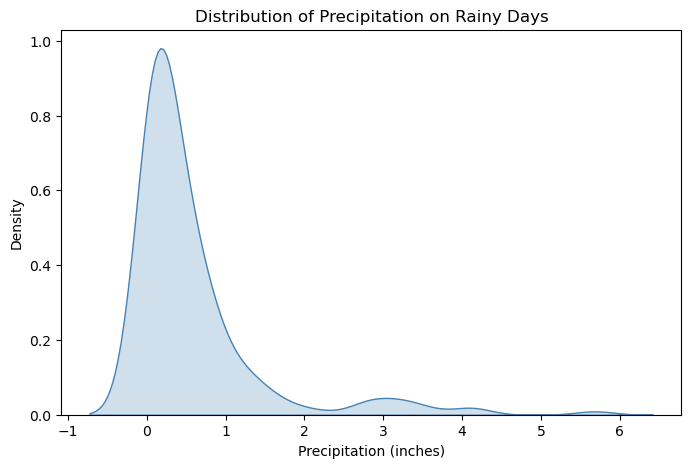

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only rainy days (rain = 1)
rainy_days = weather[weather["rain"] == 1]

# Plot the Kernel Density Estimate (KDE) for precipitation
plt.figure(figsize=(8,5))
sns.kdeplot(rainy_days["PRCP"], fill=True, bw_adjust=0.8, color="steelblue")
plt.title("Distribution of Precipitation on Rainy Days")
plt.xlabel("Precipitation (inches)")
plt.ylabel("Density")
plt.show()


To improve the model, I can extend it to a higher-order or multivariate Markov chain by incorporating additional predictors such as season, temperature, or recent rainfall intensity. This would allow transition probabilities to vary across months or weather regimes, capturing seasonal rainfall patterns and making forecasts more accurate and realistic.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [26]:
import pickle 
import numpy as np

with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

# Find all unique neighborhoods
states = set(data[0])
for i in range(1, len(data)):
    states |= set(data[i])
states = list(states)
print("Number of states (neighborhoods):", len(states))

Number of states (neighborhoods): 38


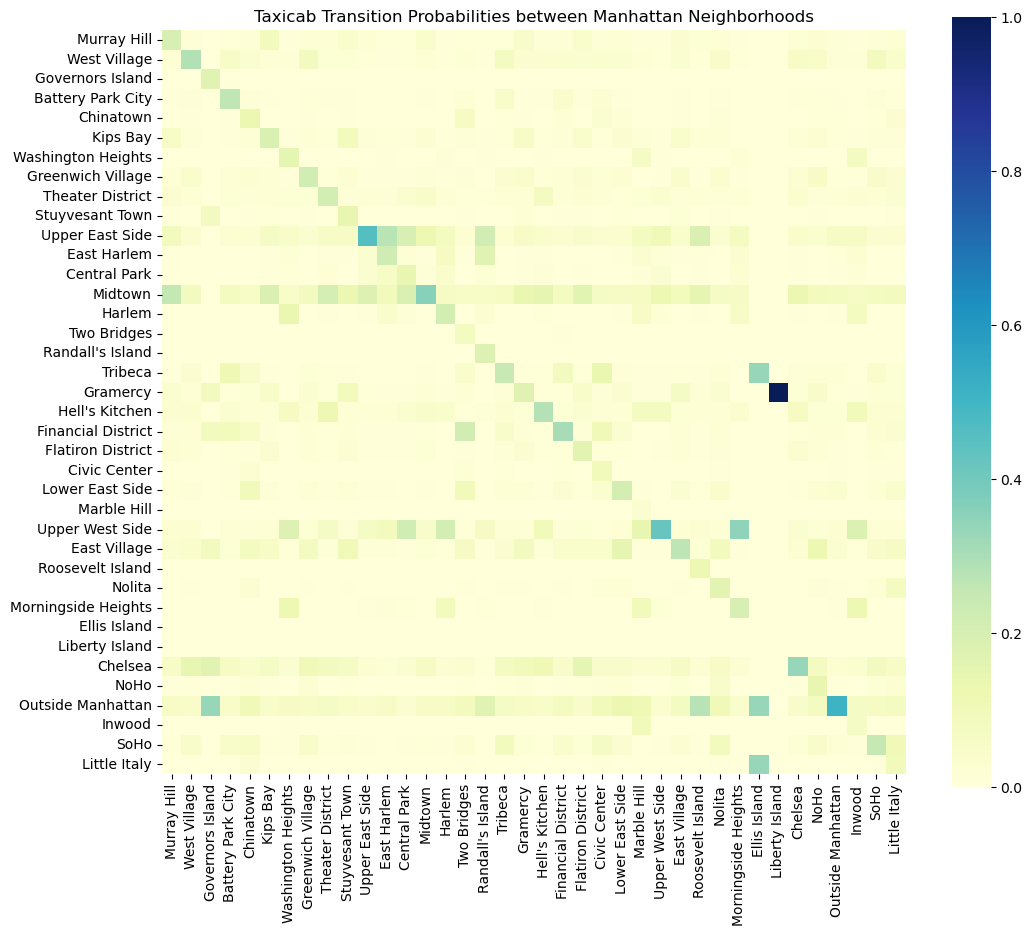

Most common route: Liberty Island → Gramercy


In [27]:
S = len(states)
tr_counts = np.zeros((S, S))

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        i_from = states.index(seq[t-1])
        i_to   = states.index(seq[t])
        tr_counts[i_to, i_from] += 1

# Normalize columns → transition probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
P = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums != 0)

# Visualize
plt.figure(figsize=(12,10))
sns.heatmap(P, cmap="YlGnBu", square=True,
            xticklabels=states, yticklabels=states)
plt.title("Taxicab Transition Probabilities between Manhattan Neighborhoods")
plt.show()

# Find most common routes
route_idx = np.unravel_index(np.argmax(P), P.shape)
print(f"Most common route: {states[route_idx[1]]} → {states[route_idx[0]]}")

The taxicab trajectories are best modeled as order 1 because the next destination depends primarily on the cab’s current location, not the full history of previous trips. Drivers make routing choices based on where they drop off passengers and the immediate surrounding demand which means that including more than one previous stop (order 2 +) adds little predictive power while increasing complexity.

In [28]:
def forecast(P, states, start_state, steps=[2,3,5,10]):
    x = np.zeros(len(states))
    x[states.index(start_state)] = 1
    for k in range(1, max(steps)+1):
        x = P @ x
        if k in steps:
            print(f"After {k} trips from {start_state}:")
            top_idx = np.argsort(x)[::-1][:5]
            for i in top_idx:
                print(f"  {states[i]}: {x[i]:.3f}")
            print()

forecast(P, states, "Hell's Kitchen")


After 2 trips from Hell's Kitchen:
  Midtown: 0.173
  Hell's Kitchen: 0.119
  Chelsea: 0.109
  Upper West Side: 0.099
  Upper East Side: 0.087

After 3 trips from Hell's Kitchen:
  Midtown: 0.173
  Upper East Side: 0.108
  Chelsea: 0.097
  Upper West Side: 0.092
  Outside Manhattan: 0.090

After 5 trips from Hell's Kitchen:
  Midtown: 0.169
  Upper East Side: 0.120
  Outside Manhattan: 0.099
  Chelsea: 0.088
  Upper West Side: 0.083

After 10 trips from Hell's Kitchen:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.079



In [29]:
x = np.ones(len(states)) / len(states)  
for _ in range(50):                     
    x_next = P @ x
    if np.allclose(x, x_next, atol=1e-6):
        break
    x = x_next

steady_state = x / x.sum()
top_idx = np.argsort(steady_state)[::-1][:10]
print("Where cabs spend most of their time in Manhattan:")
for i in top_idx:
    print(f"  {states[i]}: {steady_state[i]:.3f}")


Where cabs spend most of their time in Manhattan:
  Midtown: 0.168
  Upper East Side: 0.122
  Outside Manhattan: 0.103
  Chelsea: 0.086
  Upper West Side: 0.079
  Hell's Kitchen: 0.053
  East Village: 0.039
  Theater District: 0.038
  West Village: 0.037
  Murray Hill: 0.028
